In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import pickle
import pandas as pd
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
import matplotlib.pyplot as plt
from ml_utilities.torch_models.fc import FC
from erank.utils import load_model_from_epoch, load_directions_matrix_from_task_sweep, load_multiple_dir_matrices_from_sweep
from erank.plot import plot_models_erank
from erank.analyses import create_model_erank_df

gpu_id = 0

/home/max/anaconda3/envs/erank/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Erank plots

### Create model dict

In [2]:
sweep_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/sl-sine-10.0.1-sl-randinit-ampl-XXX-ph-XXX-taskidx-XXX_220912_234805'
sweep_output_path = Path(sweep_dir) / 'outputs'
num_vectors=1900

In [3]:
# check for missing best_epoch_files
# for p in sweep_output_path.iterdir():
#     bepf = p / 'best_epoch.txt'
#     if not bepf.exists():
#         print(str(p))

In [4]:
sine_task_distr = {'normal': '*ampl-0.1_5.0-ph-0_3.141592654*', 
                    'wide': '*ampl-0.1_10.0-ph-0_3.141592654*',
                    'narrow': '*ampl-0.1_2.5-ph-0_1.5*',
                    'almost_point': '*ampl-1.0_1.1-ph-0_0.1*'}

In [5]:
len(sine_task_distr)

4

In [6]:
# load a model
# run = next(iter(sweep_output_path.iterdir()))
# init_model = load_model_from_epoch(run, epoch=0, device='cpu')

In [7]:
# load model matrices
# model_dict = load_multiple_dir_matrices_from_sweep(path_to_runs=sweep_output_path,
#                                                    name_run_glob_pattern_dict=sine_task_distr,
#                                                    num_runs=num_vectors,
#                                                    device='cpu')
# with open(f'model_dict_num_vecs{num_vectors}.p', 'wb') as savefile:
#     pickle.dump(model_dict, savefile, protocol=pickle.HIGHEST_PROTOcolororor)

### Load model dict

In [8]:
model_dict_path = './../tmp/erank_plots/model_dict_num_vecs1900.p'
model_dict_path = Path(model_dict_path)
init_model_path = './../tmp/erank_plots/init_model.p'
init_model_path = Path(init_model_path)

In [9]:
# load init model
init_model = FC.load(init_model_path, device=gpu_id)
init_model, init_model.device

(FC(
   (fc): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=1, out_features=40, bias=True)
     (2): ReLU(inplace=True)
     (3): Linear(in_features=40, out_features=40, bias=True)
     (4): ReLU(inplace=True)
     (5): Linear(in_features=40, out_features=1, bias=True)
   )
 ),
 device(type='cuda', index=0))

In [10]:
# unpickle model dict
with open(model_dict_path, 'rb') as loadfile:
    model_dict = pickle.load(loadfile)

In [11]:
list(model_dict.keys()), type(model_dict)

(['normal#*ampl-0.1_5.0-ph-0_3.141592654*',
  'wide#*ampl-0.1_10.0-ph-0_3.141592654*',
  'narrow#*ampl-0.1_2.5-ph-0_1.5*',
  'almost_point#*ampl-1.0_1.1-ph-0_0.1*'],
 dict)

### Generate erank plot

In [12]:
# erank_df = create_model_erank_df(models=model_dict, random_init_model=init_model, device=gpu_id)

In [14]:
# erank_df.to_pickle('./erank_df.p')

In [15]:
erank_df = pd.read_pickle('./../tmp/erank_plots/erank_df.p')

In [23]:
column_name_to_plot_kwargs = {'almost_point#*ampl-1.0_1.1-ph-0_0.1*': {'label': 'Very narrow', 'color':'#ffa600'},
                              'narrow#*ampl-0.1_2.5-ph-0_1.5*': {'label': 'Narrow', 'color':'#ff6e54'}, 
                              'normal#*ampl-0.1_5.0-ph-0_3.141592654*': {'label': 'Regular', 'color':'#dd5182'}, 
                              'wide#*ampl-0.1_10.0-ph-0_3.141592654*': {'label': 'Wide', 'color':'#955196'}, 
                              'Random model initializations': {'label': 'Random model initializations', 'color':'#444e86'}, 
                              'Gaussian random': {'label': 'Gaussian random vectors', 'color':'#003f5c'}, 
                              }

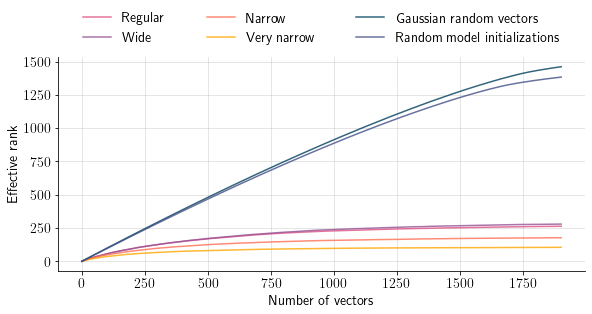

In [51]:
import os
from matplotlib import rc
os.environ["PATH"] = "/usr/local/texlive/2022/bin/x86_64-linux/" + os.pathsep + os.environ["PATH"] 
rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})
fig, ax = plot_models_erank(erank_df=erank_df, column_name_to_plot_kwargs=column_name_to_plot_kwargs, legend_columns=3, columnspacing=3.0)

In [52]:
fig.savefig(f'sinus_erank_varying_task_distribution_posterplot.pdf', bbox_inches='tight')

In [53]:
fig.savefig(f'sinus_erank_varying_task_distribution_posterplot.png', dpi=300, bbox_inches='tight')